importing dependences

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [53]:
#loading data from csv file to panda dataframe
car_dataset=pd.read_csv('car_data.csv')

In [54]:
#inspecting
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [55]:
#checking how many rows and columns it has
car_dataset.shape

(4340, 8)

In [56]:
#check more information about data
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [57]:
#checking the missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [58]:
#checking the distribution of the categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [59]:
car_dataset["car_age"] = datetime.now().year - car_dataset["year"]
car_dataset.drop("year", axis=1, inplace=True)  

In [60]:
car_dataset["brand"] = car_dataset["name"].apply(lambda x: x.split()[0])
car_dataset.drop("name", axis=1, inplace=True)

In [61]:
car_dataset = car_dataset[car_dataset["selling_price"] < car_dataset["selling_price"].quantile(0.99)]

In [62]:
#encoding column which can be change in numbers
car_dataset.replace({
    'fuel': {
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2,
        'LPG': 3,
        'Electric': 4
    },
    'seller_type': {
        'Individual': 0,
        'Dealer': 1,
        'Trustmark Dealer': 2
    },
    'transmission': {
        'Manual': 0,
        'Automatic': 1
    },
    'owner': {
        'First Owner': 0,
        'Second Owner': 1,
        'Third Owner': 2,
        'Fourth & Above Owner': 3,
        'Test Drive Car': 4
    }
}, inplace=True)


/var/folders/_y/tln9x31j5s135mgtqwb23psr0000gn/T/ipykernel_56809/195688890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({


In [63]:
brand_map = {brand: i for i, brand in enumerate(car_dataset["brand"].unique())}

car_dataset["brand"] = car_dataset["brand"].map(brand_map)


In [64]:
car_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,60000,70000,0,0,0,0,18,0
1,135000,50000,0,0,0,0,18,0
2,600000,100000,1,0,0,0,13,1
3,250000,46000,0,0,0,0,8,2
4,450000,141000,1,0,0,1,11,3


In [65]:
x = car_dataset.drop(['selling_price'], axis=1)
y = car_dataset['selling_price']
x = pd.get_dummies(x, columns=['brand'], drop_first=True)

In [66]:
print(x)

      km_driven  fuel  seller_type  transmission  owner  car_age  brand_1  \
0         70000     0            0             0      0       18    False   
1         50000     0            0             0      0       18    False   
2        100000     1            0             0      0       13     True   
3         46000     0            0             0      0        8    False   
4        141000     1            0             0      1       11    False   
...         ...   ...          ...           ...    ...      ...      ...   
4335      80000     1            0             0      1       11     True   
4336      80000     1            0             0      1       11     True   
4337      83000     0            0             0      1       16    False   
4338      90000     1            0             0      0        9     True   
4339      40000     0            0             0      0        9    False   

      brand_2  brand_3  brand_4  ...  brand_19  brand_20  brand_21  brand_2

In [67]:
print(y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4295, dtype: int64


spliting training and testing data

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

MODEL TRAINING

1.linear regresion

In [69]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [70]:
lin_reg_model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


MODEL EVALUATION

In [71]:
#predicting training data
training_data_prediction=lin_reg_model.predict(X_train)

In [72]:
#r squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("r squared error :",error_score)

r squared error : 0.6659902851409801


VISUALIZATION

Text(0.5, 1.0, 'actual price vs predictive price')

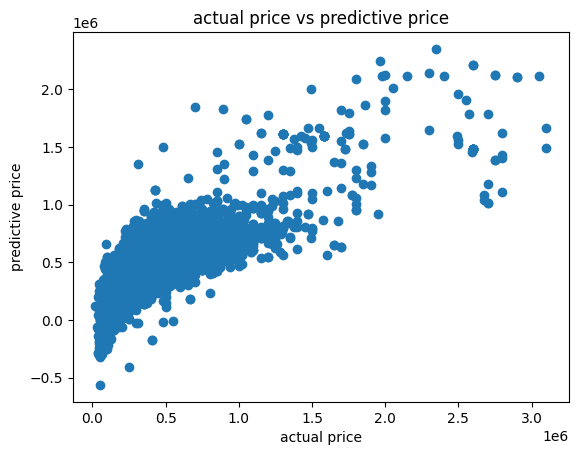

In [73]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predictive price")
plt.title("actual price vs predictive price")

In [74]:
test_data_prediction=lin_reg_model.predict(X_test)

In [75]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("r squared error :",error_score)

r squared error : 0.6241451242536433


Text(0.5, 1.0, 'actual price vs predictive price')

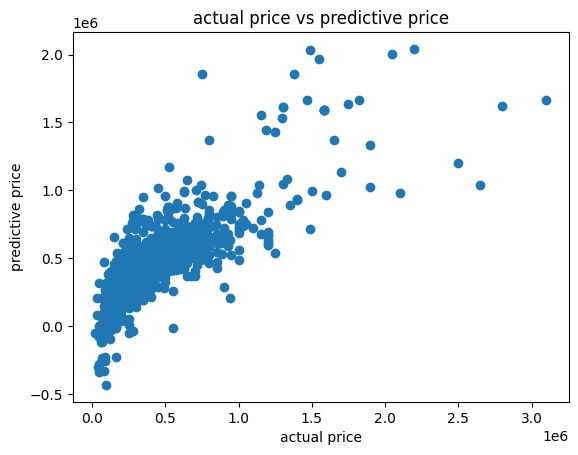

In [76]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predictive price")
plt.title("actual price vs predictive price")

In [77]:
import joblib

joblib.dump(lin_reg_model, "car_price_model.pkl")
joblib.dump(brand_map, "brand_map.pkl")
joblib.dump(X_train.columns.tolist(), "features.pkl")


['features.pkl']